# Polynomial regression

It is a special case of multiple linear regression that adds terms with degrees greater than one to the model. The real-world curvilinear relationship is captured when you transform the training data by adding polynomial terms, which are then fit in the same manner as in multiple linear regression.

In other words, this regression model is used when we have curved relationship than we use polynomial regression. 
Please find the same for polynomial regression. 

## Using numpy's polyfit. 

- numpy.polyfit(x, y, deg)
- Least sqares polynominal fit
- returns a vector of coeeficients 'p' that mininises the squared error. 

import numpy as np

In [4]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.91, 0.11, -0.78, -0.99])

In [5]:
fit up to degree = 3
z = np.polyfit(x, y, 3)fit up to degree = 3
print(z)

SyntaxError: invalid syntax (<ipython-input-5-1d0b4de44a4e>, line 1)

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn 
import seaborn as sns


sns.set_style("whitegrid")
sns.set_context("poster")

## Using Scikit-learn's PolynomialFeatures

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
# Create matrix and vectors
X = [[0.44, 0.68], [0.99, 0.23]]
Y = [109.85, 155.72]
X_test = [[0.49, 0.18]]

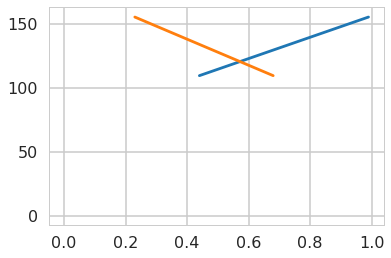

In [12]:
plt.plot(X, Y)
# plt.axis([0, 10, 0, 24])
plt.plot(True)
plt.show()

In [16]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)

In [17]:
lg = LinearRegression()
lg.fit(X_, y)
lg.coef_

array([ 0.        , -0.34515908,  0.06009686])

In [18]:
lg.predict(X_test_)

ValueError: shapes (1,6) and (3,) not aligned: 6 (dim 1) != 3 (dim 0)

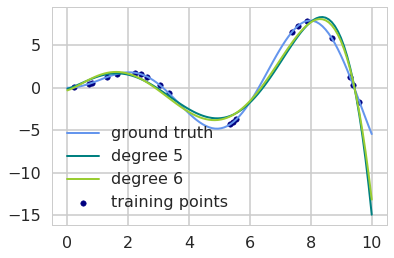

In [13]:
# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold', "red", "gray"]
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([5, 6]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [14]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
 
# implement liner regression with numpy and sklearn
 
# 1. Generate some random data
np.random.seed(seed=0)
size=1000
x_data = np.random.random(size)
y_data=6*x_data-32*x_data**4-x_data**2-np.sqrt(x_data) # -32x^4-x^2+6x-sqrt(x)
 
# 2. Split equally between test and train
x_train = x_data[:int(size/2)]
x_test = x_data[int(size/2):]
 
y_train=y_data[:int(size/2)]
y_test = y_data[int(size/2):]

Error with poly1d at degree 1 is 18.0437708078
Error with sk-learn.LinearRegression at degree 1 is 18.0437708078
Error with poly1d at degree 2 is 1.46620837219
Error with sk-learn.LinearRegression at degree 2 is 1.46620837219
Error with poly1d at degree 3 is 0.0198827270592
Error with sk-learn.LinearRegression at degree 3 is 0.0198827270592


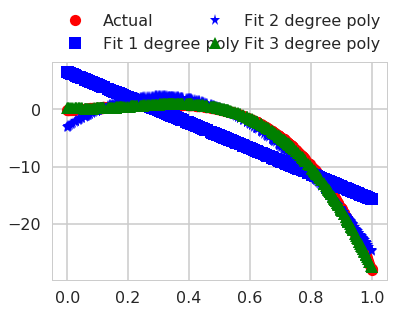

In [15]:
plot_config=['bs', 'b*', 'g^']
plt.plot(x_test, y_test, 'ro', label="Actual")
# 3. Set the polynomial degree to be fitted betwee 1 and 3
top_degree=3
d_degree = np.arange(1,top_degree+1)
for degree in d_degree:
     
    poly_fit = np.poly1d(np.polyfit(x_train,y_train, degree))
    # print poly_fit.coeffs
     
    # 4. Fit the numpy polynomial
    predict=poly_fit(x_test)
    error=np.mean((predict-y_test)**2)
     
    print ("Error with poly1d at degree %s is %s" %(degree, error))
     
    # 5. Create a fit a polynomial with sk-learn LinearRegression
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])
     
    predict_sk=model.predict(x_test[:,np.newaxis])
    error_sk=np.mean((predict_sk.flatten()-y_test)**2)
     
    print ("Error with sk-learn.LinearRegression at degree %s is %s" %(degree, error_sk))
     
    #plt.plot(x_test, y_test, '-', label="Actual")
    plt.plot(x_test, predict, plot_config[degree-1], label="Fit "+str(degree)+ " degree poly")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
 
plt.show()